# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src = "https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<br> 

**Data**

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

# Importing the necessary libraries

In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# importing library for splitting the dataset
from sklearn.model_selection import train_test_split

# importing StandardScaler for scaling the dataset
from sklearn.preprocessing import StandardScaler

# importing statsmodels library for model building
import statsmodels.api as sm

# importing RFE for optimal feature selection for model building
from sklearn.feature_selection import RFE

# importing Logistic Regression library from sklearn
from sklearn.linear_model import LogisticRegression

# importing library to check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing metrics from sklearn for model evaluation
from sklearn import metrics 

# importing libraries from sklearn.metrics for finding precision and recall
from sklearn.metrics import precision_score, recall_score

# importing precision_recall_curve from sklearn.metrics to find the precision recall curve
from sklearn.metrics import precision_recall_curve

# importing F-1 score from sklearn.metrics for evaluation 
from sklearn.metrics import f1_score

# importing classification_report from sklearn.metrics for evaluation 
from sklearn.metrics import classification_report

# Step 1: Reading and Understanding data

In [575]:
df = pd.read_csv("Leads.csv")

In [576]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [577]:
df.shape

(9240, 37)

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [579]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [580]:
# creating a copy of the original dataframe
df2 = df.copy()
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


# Step 2 : Data Cleaning

- Checking unique values and treating them
- Missing Value Treatment
- Outlier Treatment
- Treatment of irrelevant features
- Sanity Check

#### Checking unique values

In [581]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

Dropping features `Prospect ID`, `Lead Number` because all the values in these columns are unique, which is of no use in our analysis

In [582]:
df.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

### Missing Value Treatment

In [583]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [584]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Lead Quality                                    0.52
Asymmetrique Activity Index                     0.46
Asymmetrique Profile Score                      0.46
Asymmetrique Profile Index                      0.46
Asymmetrique Activity Score                     0.46
Tags                                            0.36
Lead Profile                                    0.29
What matters most to you in choosing a course   0.29
What is your current occupation                 0.29
Country                                         0.27
How did you hear about X Education              0.24
Specialization                                  0.16
City                                            0.15
Page Views Per Visit                            0.01
TotalVisits                                     0.01
Last Activity                                   0.01
Lead Source                                     0.00
I agree to pay the amount through cheque        0.00
A free copy of Mastering The Interview        

#### Dropping features with more than 40% missing values

In [585]:
null = (df.isnull().sum()/len(df)).sort_values(ascending=False)
null

Lead Quality                                    0.52
Asymmetrique Activity Index                     0.46
Asymmetrique Profile Score                      0.46
Asymmetrique Profile Index                      0.46
Asymmetrique Activity Score                     0.46
Tags                                            0.36
Lead Profile                                    0.29
What matters most to you in choosing a course   0.29
What is your current occupation                 0.29
Country                                         0.27
How did you hear about X Education              0.24
Specialization                                  0.16
City                                            0.15
Page Views Per Visit                            0.01
TotalVisits                                     0.01
Last Activity                                   0.01
Lead Source                                     0.00
I agree to pay the amount through cheque        0.00
A free copy of Mastering The Interview        

In [586]:
df.drop(null[null > 0.4].index, axis=1, inplace = True)

In [587]:
df.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Lead Origin                                         0
Through Recommendations                             0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About O

In [588]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [589]:
df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [590]:
df["Last Activity"].nunique()

17

In [591]:
df["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [592]:
df["Last Notable Activity"].nunique()

16

***Inference***

* `Last Activity` and `Last Notable Activity` have similar values. 
* We will drop one of the features out of them. We will drop that feature which will have less unique values. So, we will drop `Last Notable Activity` because it has less unique values as compared to `Last Activity`

In [593]:
df.drop("Last Notable Activity", axis=1, inplace=True)

#### Checking the value count of all the categorical columns

In [594]:
categ_cols = df.select_dtypes(include=object)

for i in categ_cols:
    print(i)
    print()
    print(df[i].value_counts())
    print("--------------------------------")

Lead Origin

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------------------
Lead Source

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64
--------------------------------
Do Not Email

No     8506
Yes     734
Name: Do Not Email, dtype: int64
--------------------------------
Do Not Call

No     9238
Yes      

Name: I agree to pay the amount through cheque, dtype: int64
--------------------------------
A free copy of Mastering The Interview

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
--------------------------------


#### Replacing the features having `Select` values with NULL Values for further processing

In [595]:
df = df.replace("Select", np.nan)

#### Checking the Missing values again

In [596]:
df.isnull().sum().sort_values(ascending=False)/len(df)

How did you hear about X Education              0.78
Lead Profile                                    0.74
City                                            0.40
Specialization                                  0.37
Tags                                            0.36
What matters most to you in choosing a course   0.29
What is your current occupation                 0.29
Country                                         0.27
TotalVisits                                     0.01
Page Views Per Visit                            0.01
Last Activity                                   0.01
Lead Source                                     0.00
Receive More Updates About Our Courses          0.00
Update me on Supply Chain Content               0.00
Lead Origin                                     0.00
Digital Advertisement                           0.00
Get updates on DM Content                       0.00
I agree to pay the amount through cheque        0.00
Through Recommendations                       

#### The features `How did you hear about X Education`, `Lead Profile` have a large number of missing values. 
#### So we need drop these features as it will affect our analysis.

- We will not not drop `City`, `Specialization`, and `Tags` as these features are important for the problem

In [597]:
df.drop(["How did you hear about X Education", "Lead Profile"], axis=1, inplace=True)

#### Dropping missing rows from `TotalVisits`, `Page Views Per Visit`, `Last Activity`  because they have very few missing values       

In [598]:
rows = ["TotalVisits", "Page Views Per Visit", "Last Activity", "Lead Source"]

In [599]:
df.dropna(subset=rows, axis=0, inplace=True)

#### Checking the Missing values again

In [600]:
df.isnull().sum().sort_values(ascending=False)/len(df)

City                                            0.39
Tags                                            0.37
Specialization                                  0.36
What matters most to you in choosing a course   0.30
What is your current occupation                 0.30
Country                                         0.25
Lead Origin                                     0.00
X Education Forums                              0.00
I agree to pay the amount through cheque        0.00
Get updates on DM Content                       0.00
Update me on Supply Chain Content               0.00
Receive More Updates About Our Courses          0.00
Through Recommendations                         0.00
Digital Advertisement                           0.00
Newspaper                                       0.00
Search                                          0.00
Newspaper Article                               0.00
Magazine                                        0.00
Lead Source                                   

#### Imputing Missing Values

#### Checking distribution of `Country` column

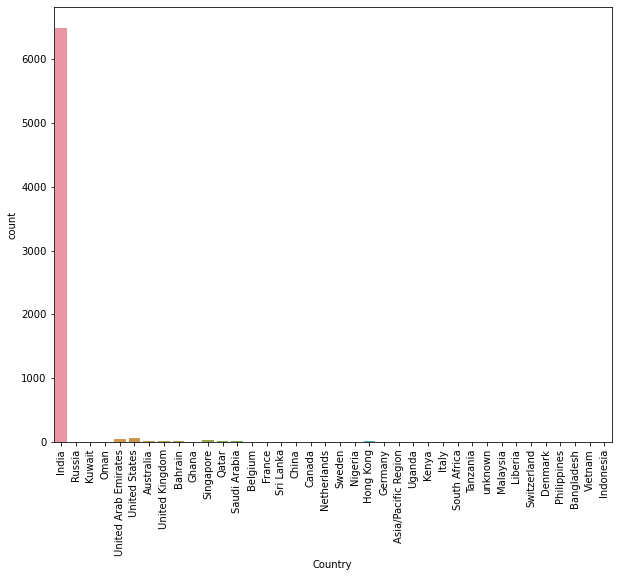

In [601]:
plt.figure(figsize = (10,8))
sns.countplot(df["Country"])
plt.xticks(rotation = 90)
plt.show()

* Country is having missing values but it is an important feature. So we will not drop it. We will impute it with the highest occuring values

* Imputing missing values in `Country` with the highest occuring value in the columns 

In [602]:
df["Country"] = df["Country"].fillna(df["Country"].mode()[0])

* Replacing other countries which are not India as `Outside India` because the count of values for other countries are very low.

In [603]:
df['Country'] = df['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
df['Country'].value_counts()

India            8787
Outside India     287
Name: Country, dtype: int64

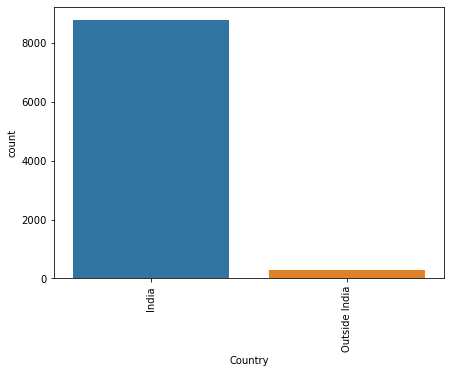

In [604]:
plt.figure(figsize = (7,5))
sns.countplot(df["Country"])
plt.xticks(rotation = 90)
plt.show()

#### Checking distribution of `What is your current occupation` feature

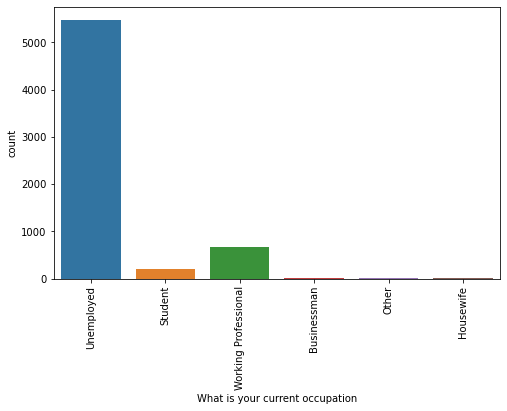

In [605]:
plt.figure(figsize = (8,5))
sns.countplot(df["What is your current occupation"])
plt.xticks(rotation = 90)
plt.show()

* `What is your current occupation` is having missing values but it is an important feature. So we will not drop it. We will impute it with the highest occuring values

* Imputing missing values in `What is your current occupation` with the highest occuring value in the columns 

In [606]:
df["What is your current occupation"] = df["What is your current occupation"].fillna(
                                        df["What is your current occupation"].mode()[0])

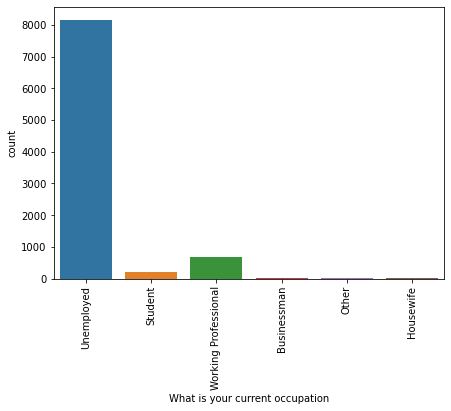

In [607]:
plt.figure(figsize = (7,5))
sns.countplot(df["What is your current occupation"])
plt.xticks(rotation = 90)
plt.show()

#### Checking Missing Values again

In [608]:
df.isnull().sum().sort_values(ascending = False)

City                                             3575
Tags                                             3327
Specialization                                   3282
What matters most to you in choosing a course    2702
Lead Origin                                         0
Newspaper Article                                   0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Search                                              0
Magazine                                            0
Lead Source                                         0
What is your current occupation                     0
Country                     

#### Checking the distrubution of `Specialization` feature

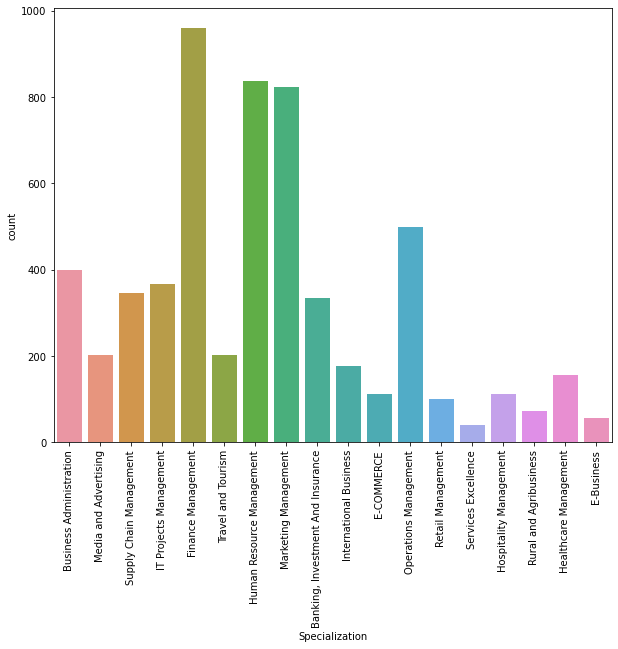

In [609]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["Specialization"])
plt.xticks(rotation=90)
plt.show()

* Replacing the missing values in `Specialization` with `Others`

In [610]:
df["Specialization"] = df["Specialization"].replace(np.nan, "Others")

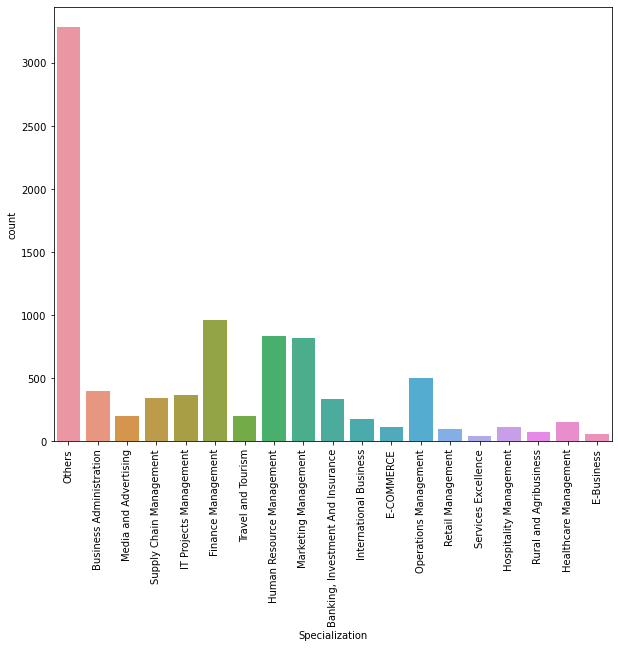

In [611]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["Specialization"])
plt.xticks(rotation=90)
plt.show()

#### Checking the distrubution of `City` feature

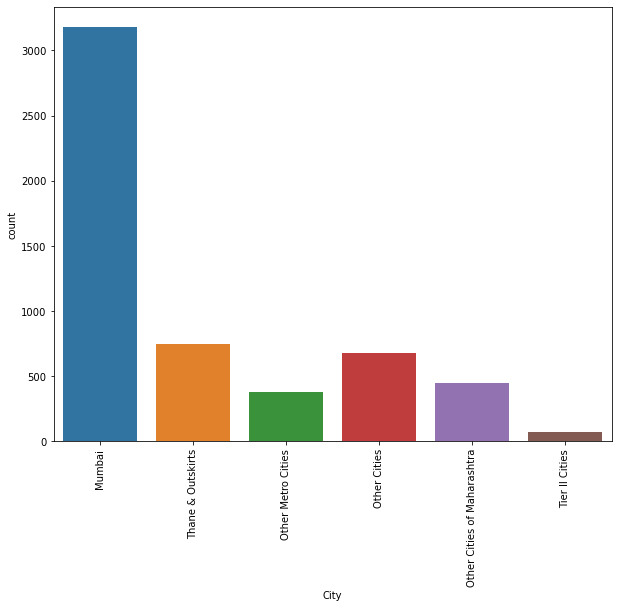

In [612]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["City"])
plt.xticks(rotation=90)
plt.show()

* Replacing the missing values in `City` with `Unknown`

In [613]:
df["City"] = df["City"].replace(np.nan, "Unknown")

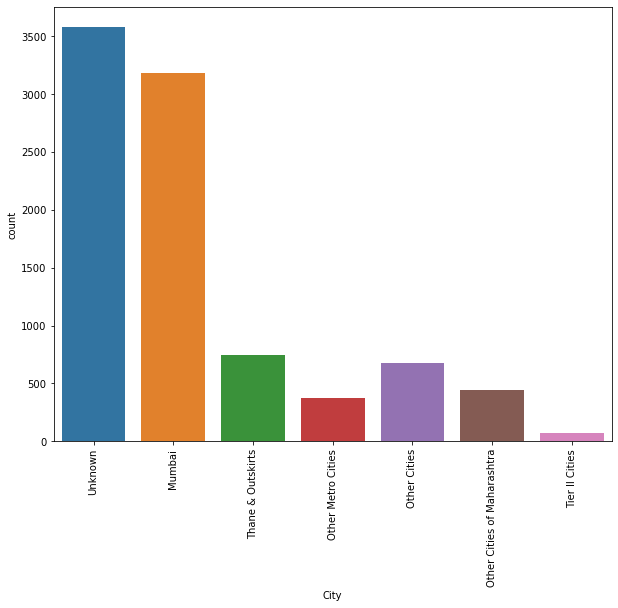

In [614]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["City"])
plt.xticks(rotation=90)
plt.show()

#### Checking the distrubution of `Tags` feature

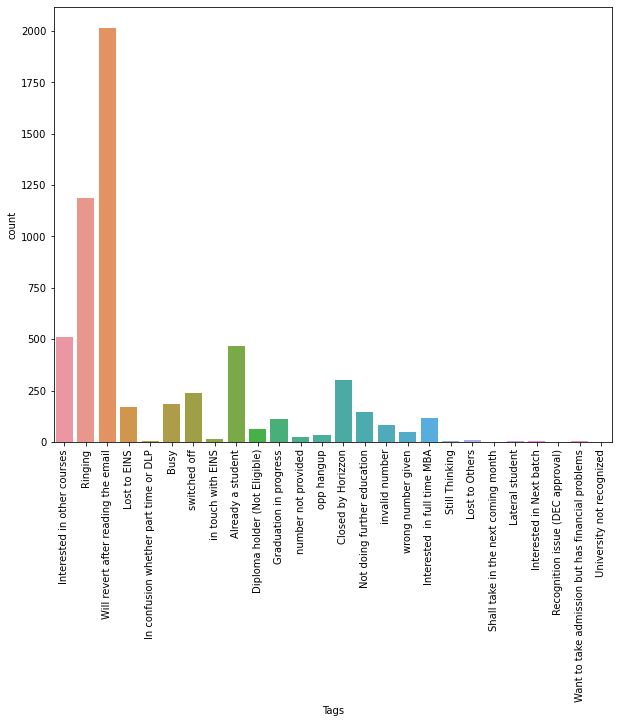

In [615]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["Tags"])
plt.xticks(rotation=90)
plt.show()

* Replacing the missing values in `Tags` with `Unknown`

In [616]:
df["Tags"] = df["Tags"].replace(np.nan, "Unknown")

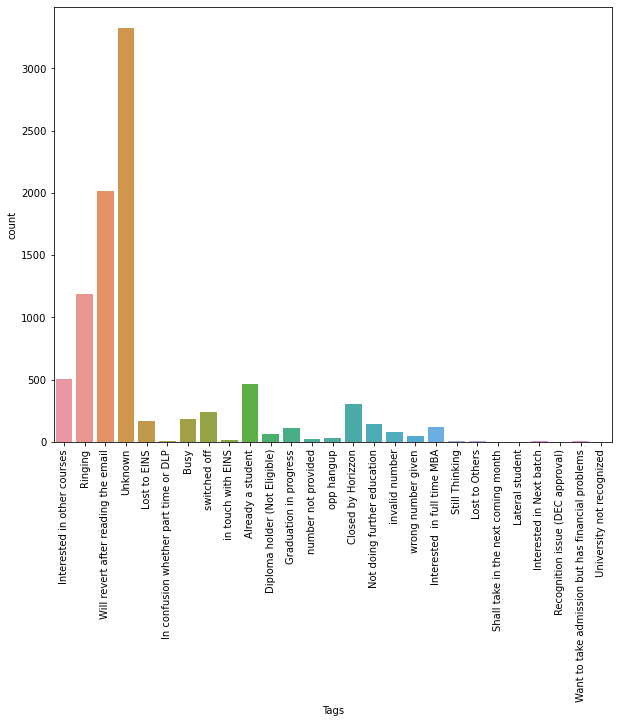

In [617]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["Tags"])
plt.xticks(rotation=90)
plt.show()

In [618]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2702
Lead Origin                                         0
Magazine                                            0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Tags                                                0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Search                                              0
Lead Source                                         0
What is your current occupation                     0
Specialization                                      0
Country                     

### Dropping Irrelevant features

In [619]:
irrelevant = ['What matters most to you in choosing a course','Search',
              'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
              'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
              'Get updates on DM Content','I agree to pay the amount through cheque',
              'A free copy of Mastering The Interview']

In [620]:
df.drop(irrelevant, axis=1, inplace=True)

In [621]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Unknown
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Others,Unemployed,Ringing,Unknown
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Mumbai


In [622]:
df.shape

(9074, 14)

### Sanity Check

#### Checking distribution of `Lead Source` feature

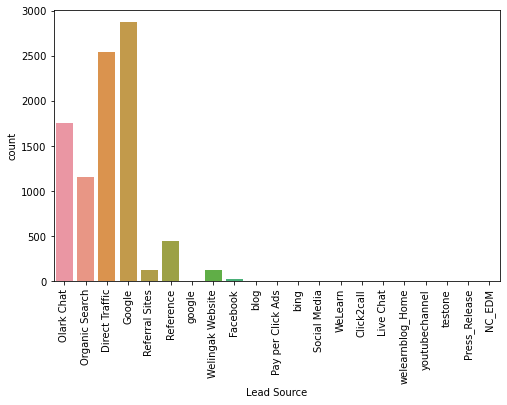

In [623]:
plt.figure(figsize = (8,5))
sns.countplot(df["Lead Source"])
plt.xticks(rotation = 90)
plt.show()

In [624]:
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

* There are 2 similar values : `Google` and `google` in `Lead source` feature. We will replace it

In [625]:
df["Lead Source"] = df["Lead Source"].replace("google", df["Lead Source"].mode()[0])

### Outlier Treatment

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Country                          9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Tags                

#### Creating Boxplots for Numeric features

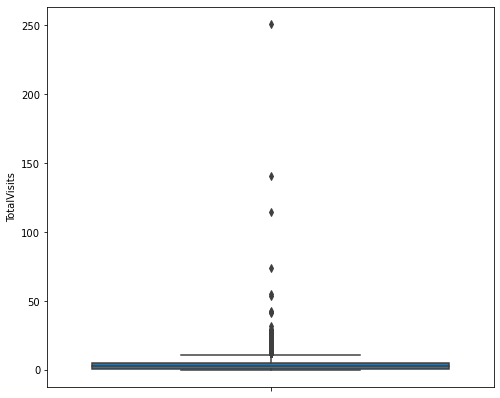

In [627]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["TotalVisits"])
plt.show()

***Inference***

* We can see that there are outliers in `TotalVisits` column

In [628]:
df[~(df["TotalVisits"] < 50)].shape

(6, 14)

In [629]:
df = df[~(df["TotalVisits"] > 50)]

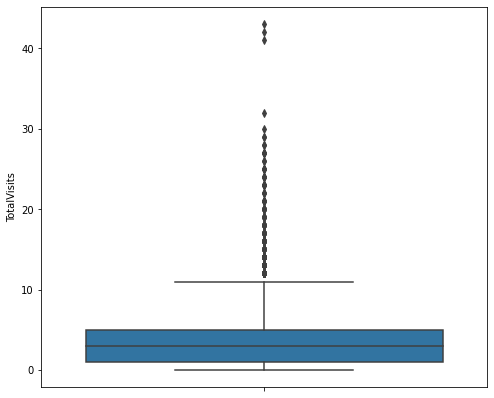

In [630]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["TotalVisits"])
plt.show()

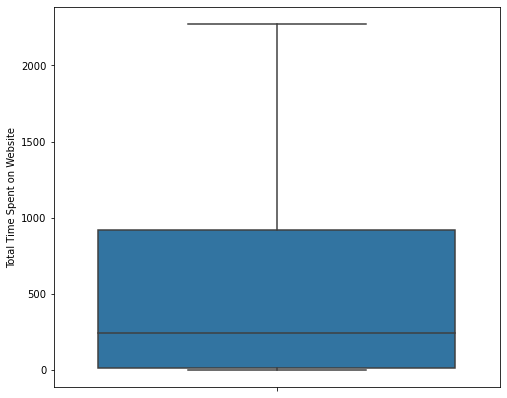

In [631]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["Total Time Spent on Website"])
plt.show()

***Inference***

* There are no outliers in `Total Time Spent on Website` column

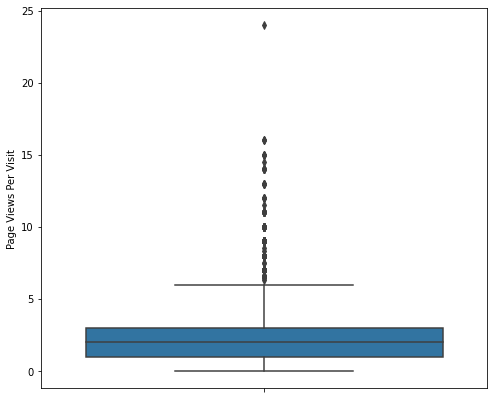

In [632]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["Page Views Per Visit"])
plt.show()

***Inference***

* We can see that there are outliers in `Page Views Per Visit` column

In [633]:
df[~(df["Page Views Per Visit"] < 20)].shape

(1, 14)

In [634]:
df = df[~(df["Page Views Per Visit"] > 20)]

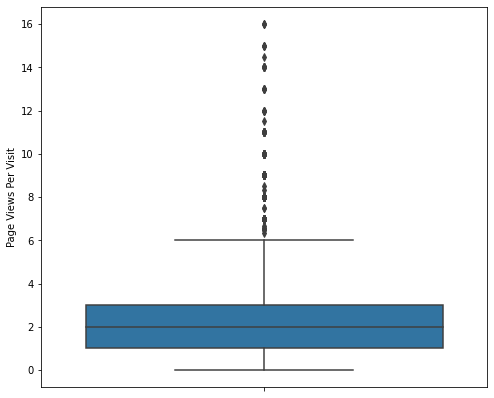

In [635]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["Page Views Per Visit"])
plt.show()

In [636]:
df.shape

(9067, 14)

# Step 3: EDA

In [637]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Unknown
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Others,Unemployed,Ringing,Unknown
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Mumbai


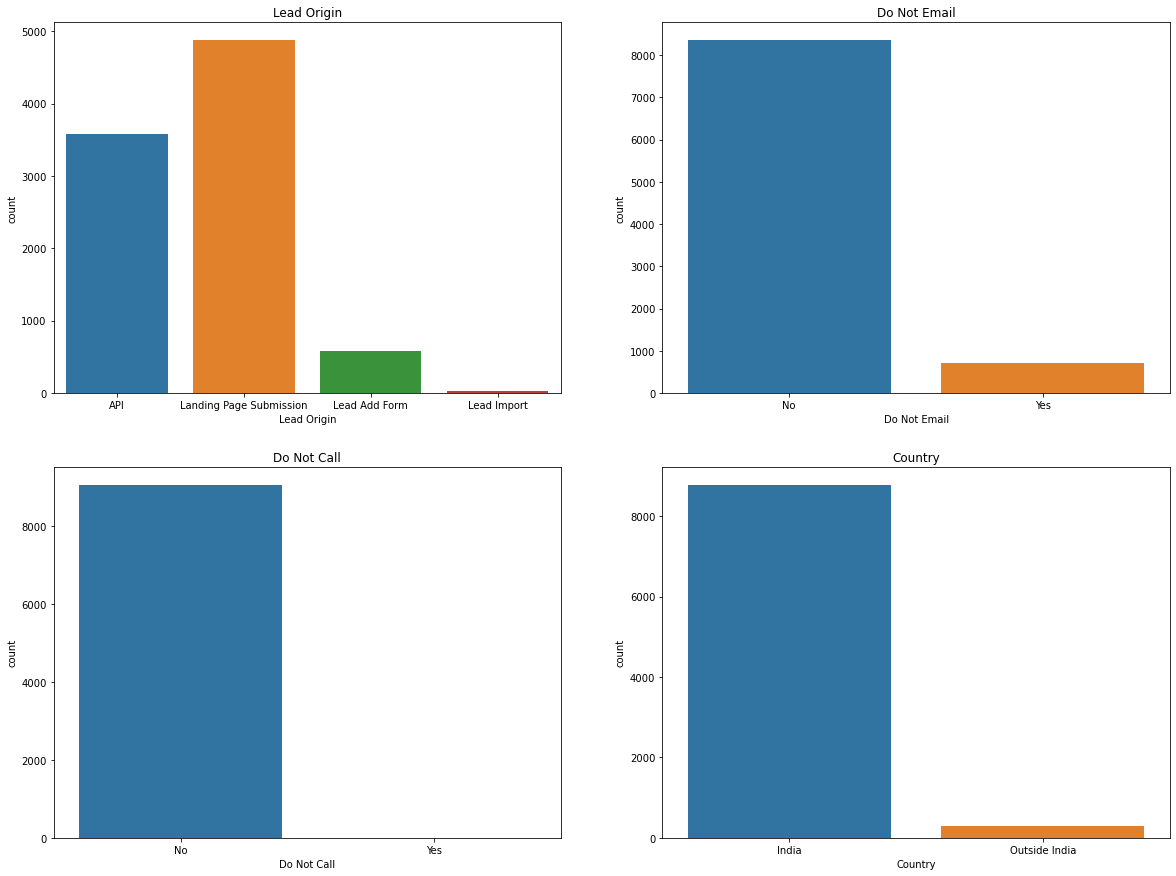

In [638]:
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(2,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(2,2,4)
sns.countplot(df['Country'])
plt.title('Country')

plt.show()

***Inference***

- In `Lead Origin`, the maximum number of leads are coming from `landing page submission` and `lead import` have lowest number of leads coming.
- People are interested in getting `Email & Calls`, so thats why the `No's` in `Do Not Call` & `Do Not Email` is higher as compared to `Yes's`.
- Most of the lead in this data is from Country `India`.

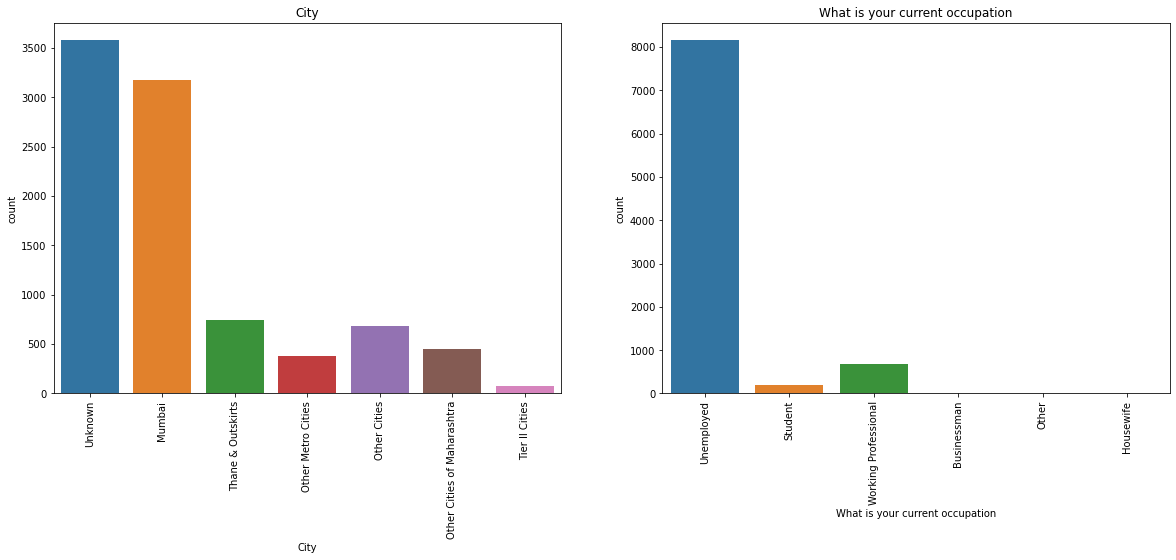

In [639]:
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(df['City'])
plt.title('City')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation'])
plt.title('What is your current occupation')
plt.xticks(rotation = 90)

plt.show()

***Inference***

- Before imputing the `City` column the maximum number of leads were from `Mumbai`, but after imputing it we have `Unknown` location data as highest.
- In `What is your current occupation` we have highest number of leads as `Unemployed`.

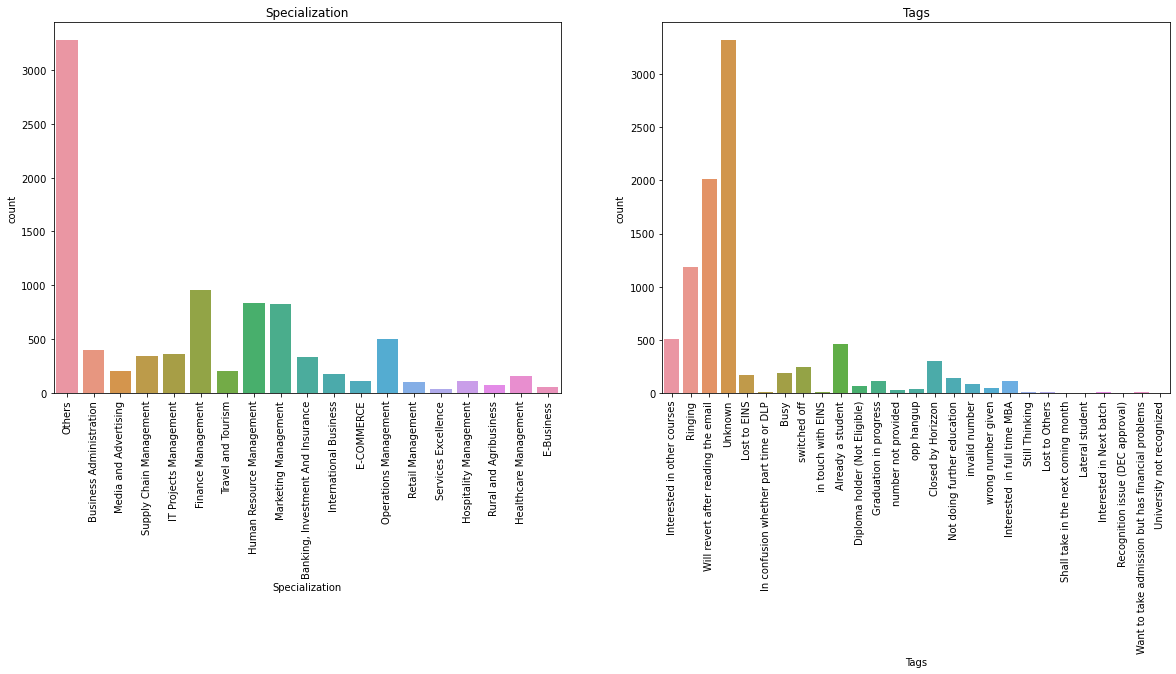

In [640]:
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(df['Specialization'])
plt.title('Specialization')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(df['Tags'])
plt.title('Tags')
plt.xticks(rotation = 90)

plt.show()

***Inference***

- We have `Others` and `Unknown` leads as the highest number of leads in `Specialization` and `Tags` respectively.

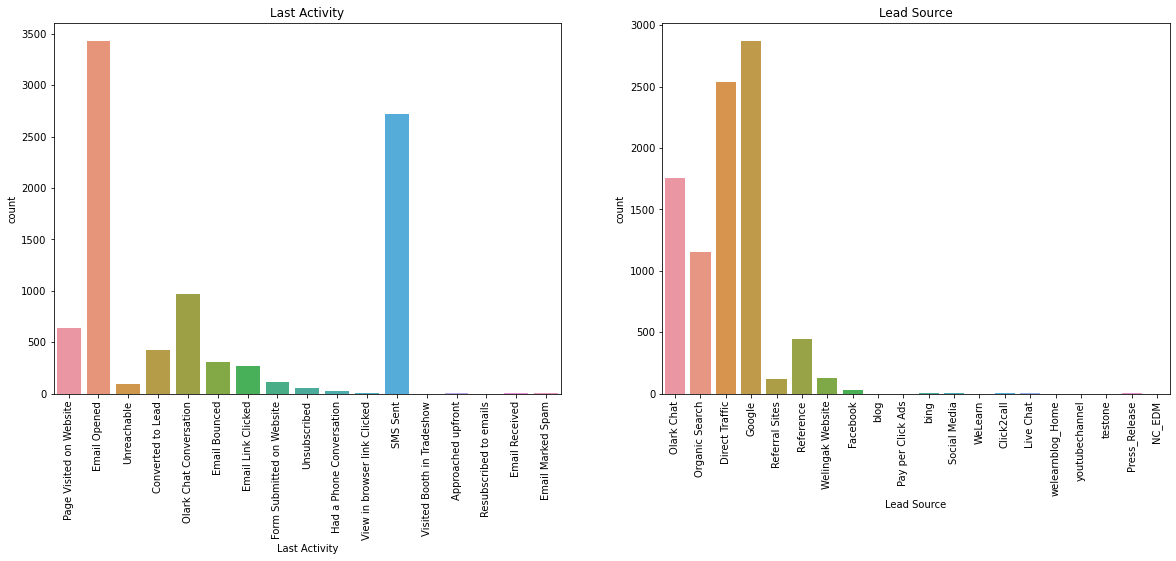

In [641]:
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(df['Last Activity'])
plt.title('Last Activity')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(df['Lead Source'])
plt.title('Lead Source')
plt.xticks(rotation = 90)

plt.show()

***Inference***

- In `Last Activity` both the `Email Opened` & `SMS Sent` is the main engaging factor of the leads.
- In ` Lead Source` the `Google, Direct Traffic, and Olark Chat` shows the maximum number of lead source.

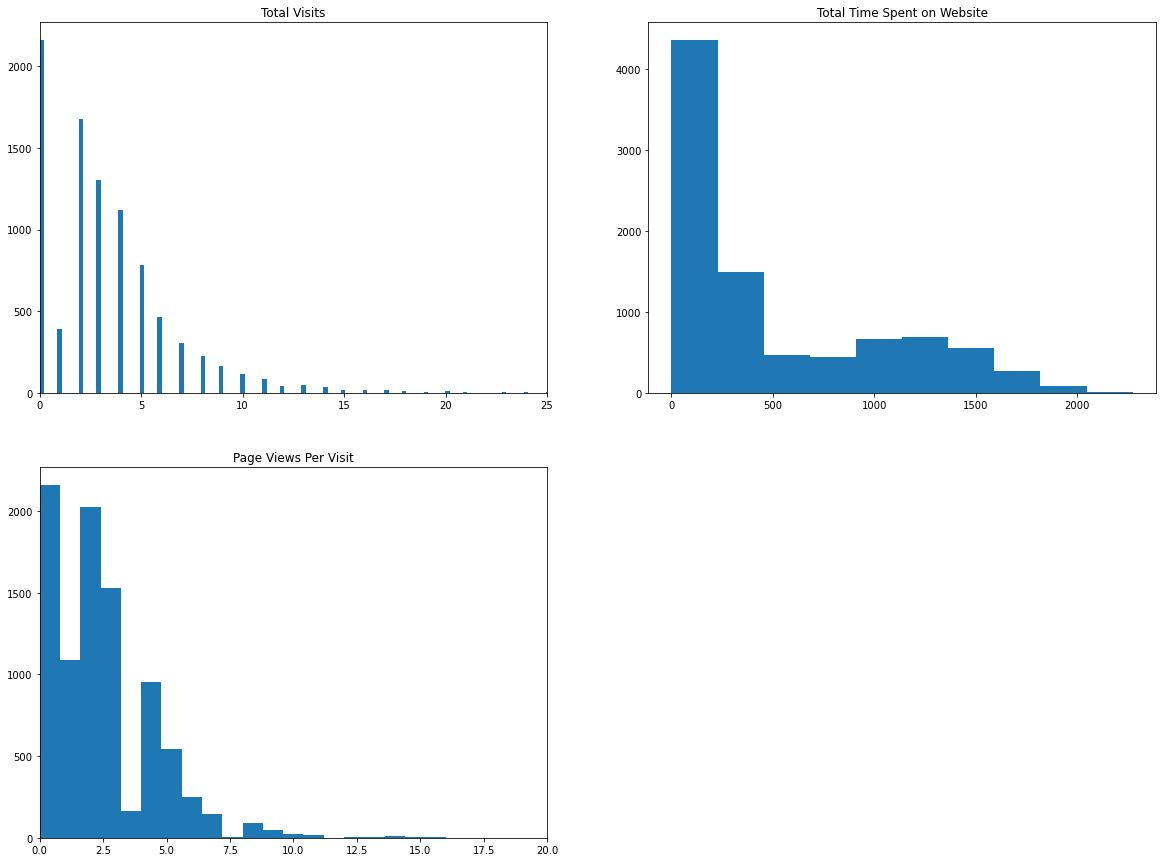

In [642]:
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

#### Plotting all the categorical variables with `Converted` as hue.

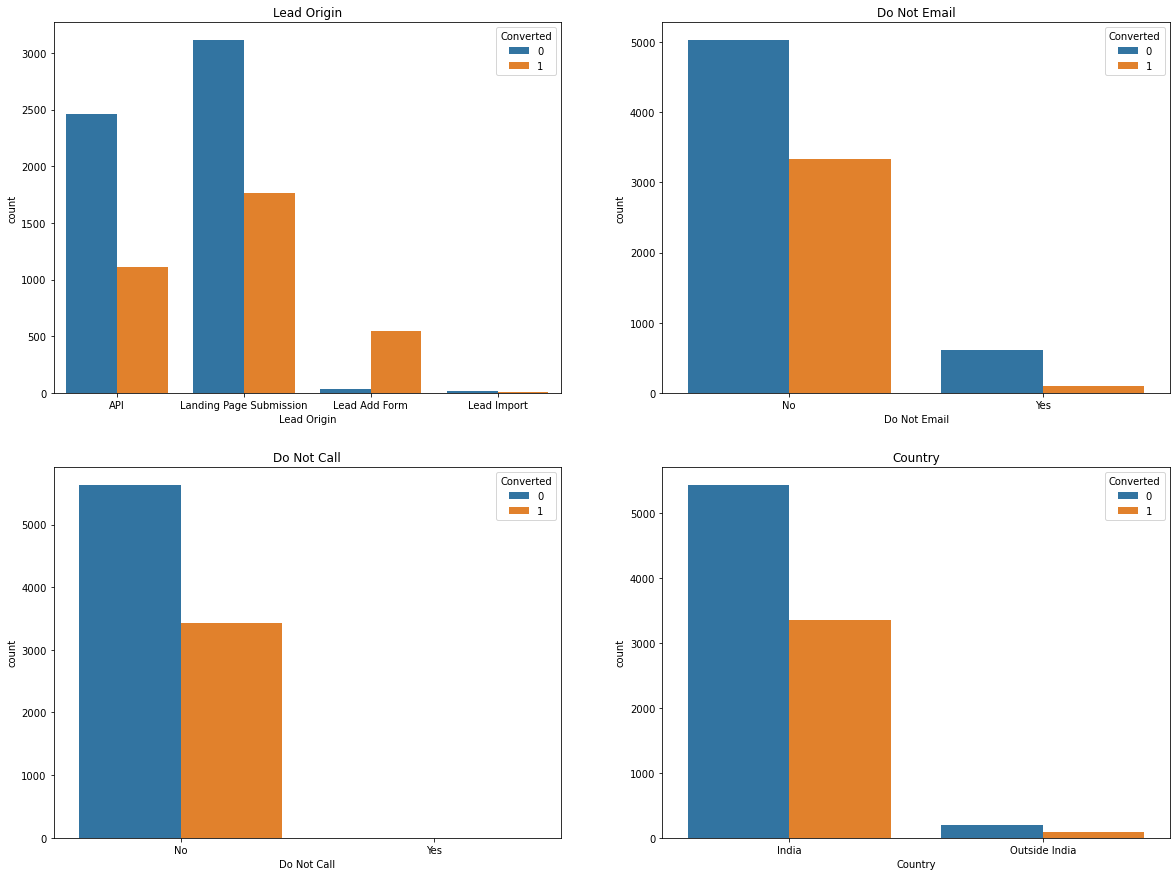

In [643]:
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(df['Lead Origin'], hue=df["Converted"])
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(df['Do Not Email'], hue=df["Converted"])
plt.title('Do Not Email')

plt.subplot(2,2,3)
sns.countplot(df['Do Not Call'], hue=df["Converted"])
plt.title('Do Not Call')

plt.subplot(2,2,4)
sns.countplot(df['Country'], hue=df["Converted"])
plt.title('Country')

plt.show()

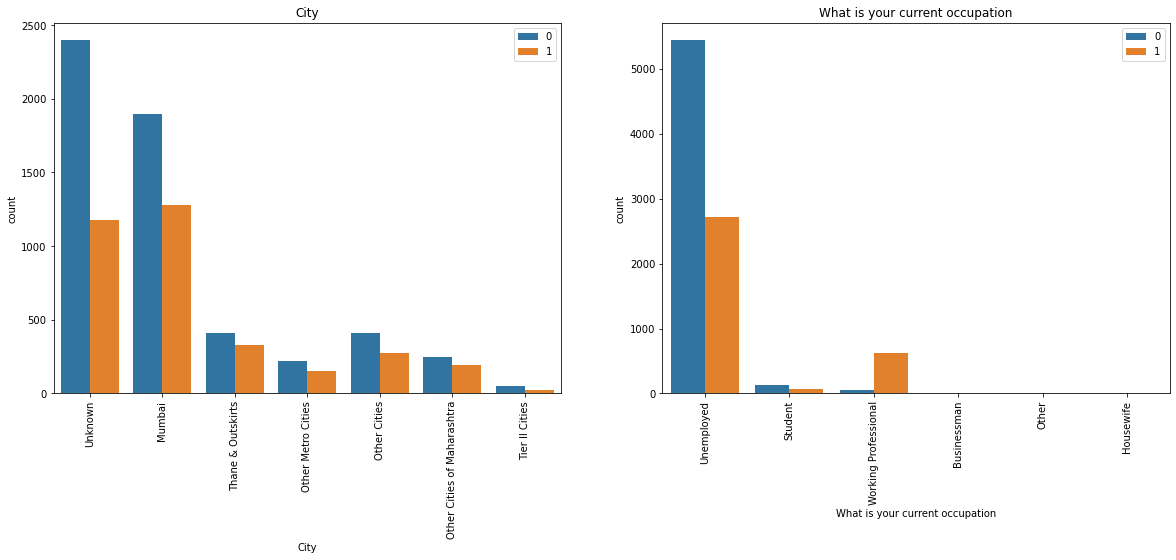

In [644]:
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(df['City'], hue=df["Converted"])
plt.title('City')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')

plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation'], hue=df["Converted"])
plt.title('What is your current occupation')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')

plt.show()

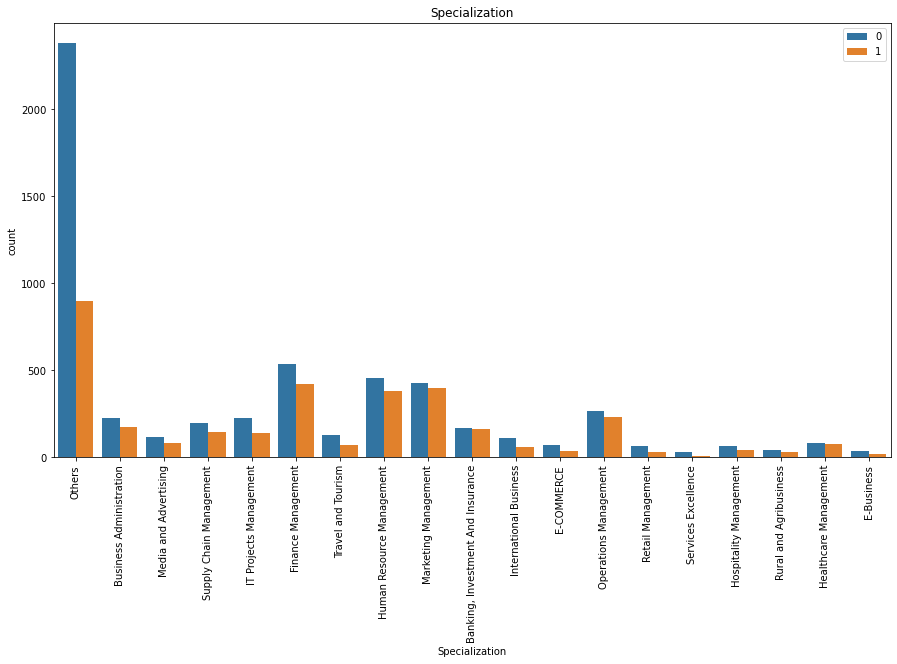

In [645]:
plt.figure(figsize = [15,8])
sns.countplot(df['Specialization'], hue=df["Converted"])
plt.title('Specialization')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

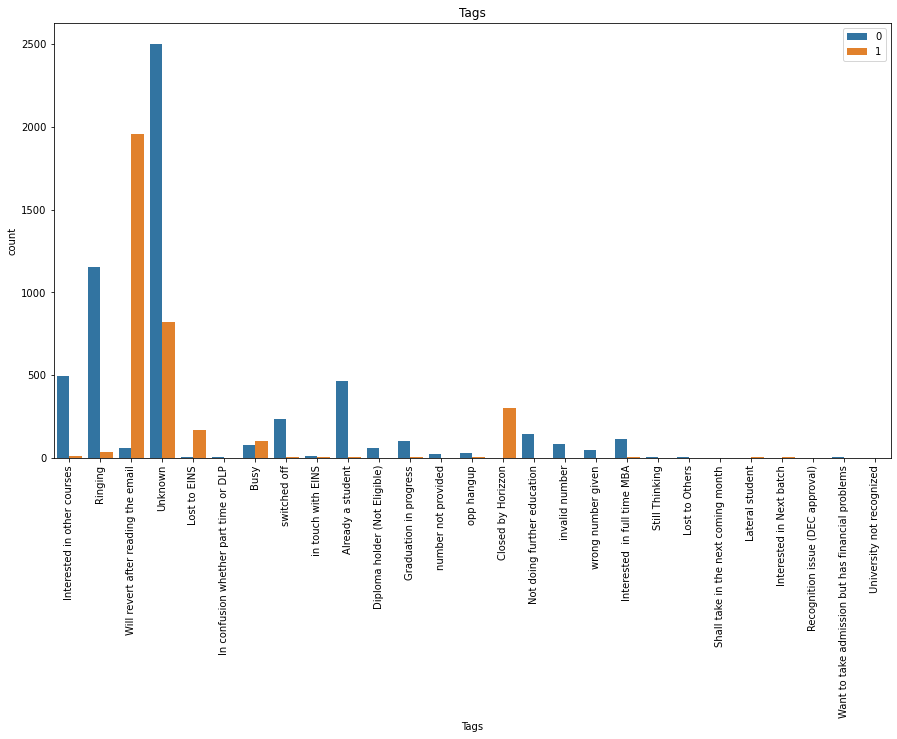

In [646]:
plt.figure(figsize = [15,8])
sns.countplot(df['Tags'], hue=df["Converted"])
plt.title('Tags')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

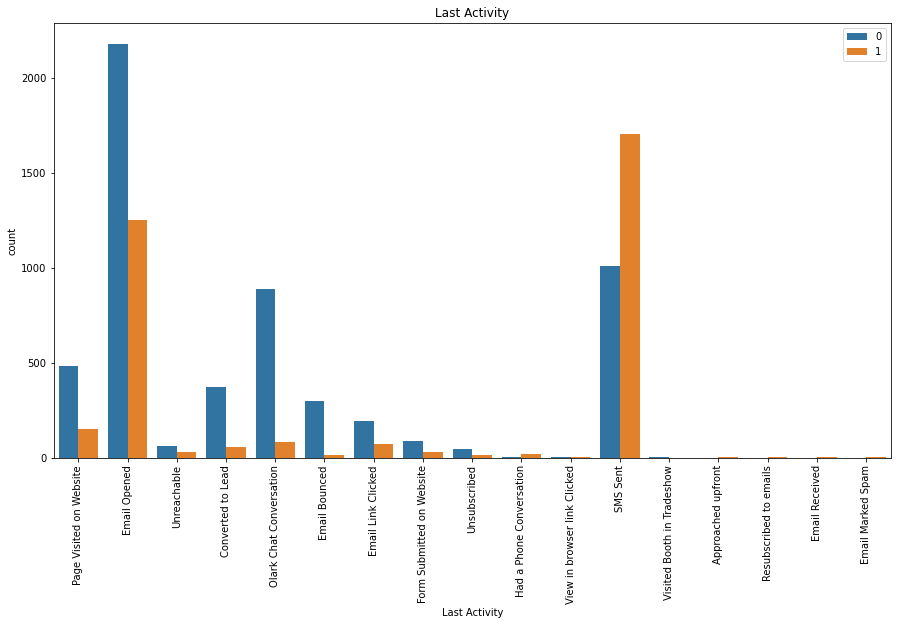

In [647]:
plt.figure(figsize = (15,8))
sns.countplot(df['Last Activity'], hue=df["Converted"])
plt.title('Last Activity')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

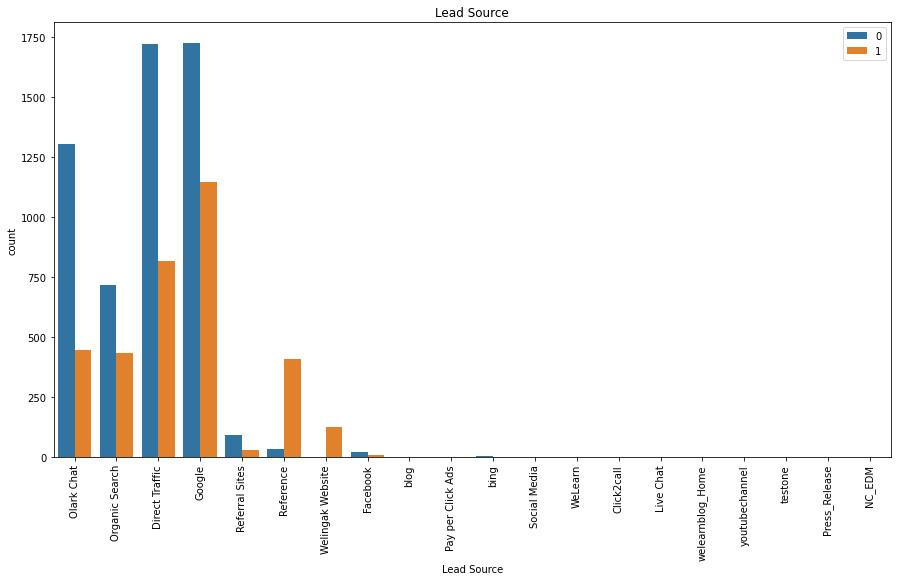

In [648]:
plt.figure(figsize = [15,8])
sns.countplot(df['Lead Source'], hue=df["Converted"])
plt.title('Lead Source')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.show()

### Correlation Heatmap

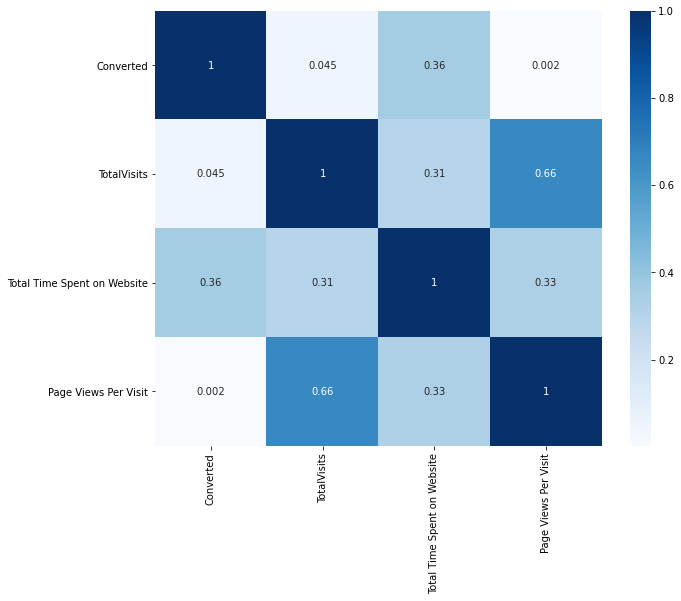

In [649]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True, cmap="Blues")
plt.show()

***Inference***

* No numerical feature is highly correlated with the target variable (`Converted`).
* No numerical independent variable is highly correlated with other independant variable.

# Step 4: Data Preparation

### Dummy Variable Encoding

In [650]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Unknown
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Others,Unemployed,Ringing,Unknown
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Mumbai


#### Creating Dummy Variables

In [651]:
dummy = pd.get_dummies(df[["Lead Origin", "Lead Source", "Country", "What is your current occupation", 
                           "Last Activity", "Do Not Email", "Do Not Call"]], drop_first=True)

In [652]:
df = pd.concat([df, dummy], axis=1)

In [653]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Do Not Email_Yes,Do Not Call_Yes
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,India,...,0,1,0,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,...,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,...,0,0,0,0,0,0,0,0,0,0


In [654]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Tags'
ml = pd.get_dummies(df['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)


# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(df['Specialization'], prefix='Specialization')
# Dropping the level called 'Others' which represents null/select values
ml1 = ml.drop(['Specialization_Others'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)


# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(df['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)


df.shape

(9067, 110)

#### Dropping the original columns on which the dummy variables have been created

In [655]:
df.drop(["Lead Origin", "Lead Source", "Tags",
        "Country", "Specialization", "What is your current occupation", "Last Activity",
        "Do Not Email", "Do Not Call", "City"], 
        axis=1, inplace=True)

In [656]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.00,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2.00,1428,1.00,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#### Checking the correlation for all the varaibles 

In [657]:
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Converted,1.00,0.05,0.36,0.00,-0.04,0.30,-0.01,-0.07,-0.01,0.03,...,0.01,-0.01,0.02,-0.01,0.04,0.01,0.03,0.01,0.04,-0.01
TotalVisits,0.05,1.00,0.31,0.66,0.38,-0.23,-0.05,0.11,-0.05,0.16,...,0.04,0.02,0.05,0.09,0.24,0.08,0.05,0.06,0.10,0.02
Total Time Spent on Website,0.36,0.31,1.00,0.33,0.29,-0.19,-0.05,0.14,-0.05,0.22,...,0.02,0.00,0.05,0.04,0.18,0.06,0.07,0.05,0.08,0.02
Page Views Per Visit,0.00,0.66,0.33,1.00,0.50,-0.28,-0.06,0.13,-0.06,0.22,...,0.02,0.02,0.07,0.12,0.27,0.09,0.09,0.10,0.09,0.03
Lead Origin_Landing Page Submission,-0.04,0.38,0.29,0.50,1.00,-0.28,-0.06,0.52,-0.06,0.08,...,0.06,0.05,0.13,0.11,0.50,0.17,0.15,0.16,0.15,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Other Cities,0.01,0.08,0.06,0.09,0.17,-0.05,0.01,0.12,0.00,-0.07,...,0.08,0.02,0.02,0.07,-0.21,1.00,-0.06,-0.06,-0.09,-0.03
City_Other Cities of Maharashtra,0.03,0.05,0.07,0.09,0.15,-0.04,0.09,0.11,0.10,-0.01,...,0.07,0.00,0.03,0.01,-0.17,-0.06,1.00,-0.05,-0.07,-0.02
City_Other Metro Cities,0.01,0.06,0.05,0.10,0.16,-0.05,-0.00,0.11,-0.00,-0.07,...,0.02,0.02,0.05,0.06,-0.15,-0.06,-0.05,1.00,-0.06,-0.02
City_Thane & Outskirts,0.04,0.10,0.08,0.09,0.15,0.00,-0.00,0.06,-0.00,0.06,...,0.01,0.01,0.06,-0.00,-0.22,-0.09,-0.07,-0.06,1.00,-0.03


### Dataset Splitting

In [658]:
X = df.drop("Converted", axis=1)
y = df["Converted"]

In [659]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [660]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.00,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2.00,1428,1.00,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Standardising the Dataset

In [661]:
sc = StandardScaler()

X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = sc.fit_transform(
                                                            X_train[["TotalVisits", "Total Time Spent on Website", 
                                                            "Page Views Per Visit"]])


#### Checking the `converted` to see if the data is imbalanced or not

In [662]:
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.862578581669794

***Inference***

* We can see that that the data for `converted` feature does not seem to be highly imbalanced

# Step 5 : Model Building

### Creating classification model using statsmodels

### Model 1

In [663]:
# adding a constant to X_train
X_train_sm = sm.add_constant(X_train)

# creating the model
model_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
m1 = model_1.fit()
print(m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           98
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 03 Feb 2022   Deviance:                       68341.
Time:                        19:44:29   Pearson chi2:                 3.34e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

## Selecting Features using RFE 

In [664]:
# creating Logistic Regression model
lr = LogisticRegression()

# initialising and fittinh RFE to get the top 15 optimal features for the model  
rfe = RFE(lr, 15)         
rfe = rfe.fit(X_train, y_train)

In [665]:
# checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 49),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 64),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', False, 14),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Live Chat', False, 83),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 80),
 ('Lead Source_Press_Release', False, 67),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Social Media', False, 74),
 ('Lead Source_WeLearn', False, 85),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_blog', False, 45),
 ('Lead Source_testone', False, 79),
 ('Lead Source_welearnblog_Home', False, 61),
 ('Lead Source_youtubechannel', 

In [666]:
# keeping only the optimal features given by RFE

rfe_cols = X_train.columns[rfe.support_]

### Model 2

In [667]:
X_train = X_train[rfe_cols]
X_train

,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
2178,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7033,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6889,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4062,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
7421,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [668]:
X_train_sm = sm.add_constant(X_train)

model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
m2 = model_2.fit()
print(m2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.4
Date:                Thu, 03 Feb 2022   Deviance:                       3002.8
Time:                        19:44:32   Pearson chi2:                 7.85e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

#### Checking VIF score

In [669]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.03
13,Tags_switched off,1.02
4,Tags_Closed by Horizzon,1.01
5,Tags_Diploma holder (Not Eligible),1.00
6,Tags_Interested in full time MBA,1.00
8,Tags_Lost to EINS,1.00
9,Tags_Not doing further education,1.00
12,Tags_invalid number,1.00
14,Tags_wrong number given,1.00
7,Tags_Interested in other courses,0.32


* Dropping `Tags_wrong number given` because it has a very high p-value

In [670]:
X_train.drop("Tags_wrong number given", axis=1, inplace=True)

### Model 3

In [671]:
X_train_sm = sm.add_constant(X_train)

model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
m3 = model_3.fit()
print(m3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1516.2
Date:                Thu, 03 Feb 2022   Deviance:                       3032.3
Time:                        19:44:32   Pearson chi2:                 7.79e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

#### Checking VIF score

In [672]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.03
13,Tags_switched off,1.02
4,Tags_Closed by Horizzon,1.01
5,Tags_Diploma holder (Not Eligible),1.00
6,Tags_Interested in full time MBA,1.00
8,Tags_Lost to EINS,1.00
9,Tags_Not doing further education,1.00
12,Tags_invalid number,1.00
7,Tags_Interested in other courses,0.32
1,Last Activity_Olark Chat Conversation,0.26


# Step 6 : Model Evaluation

In [673]:
y_train_pred = m3.predict(X_train_sm)
y_train_pred[:10]

2178   0.56
7033   0.99
6889   0.05
4062   1.00
7421   0.99
421    0.01
3120   0.99
6245   0.15
3045   0.56
1306   0.95
dtype: float64

In [674]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55702484, 0.98961639, 0.04980559, 0.99998309, 0.99064384,
       0.0051782 , 0.99355102, 0.14576136, 0.55702484, 0.95435001])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [675]:
y_train.head()

2178    0
7033    1
6889    0
4062    1
7421    1
Name: Converted, dtype: int64

In [676]:
y_train_df = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_df["LeadID"] = y_train.index
y_train_df.head()

,Converted,Converted_Prob,LeadID
0,0,0.56,2178
1,1,0.99,7033
2,0,0.05,6889
3,1,1.00,4062
4,1,0.99,7421


#### Creating a new column for the predictions of the model with a cut-off of 0.5 where predictions are 1 if `converted_prob` > 0.5 else 0

In [677]:
y_train_df["Converted_pred"] = y_train_df["Converted_Prob"].map(lambda x:1 if x > 0.5 else 0)

In [678]:
y_train_df.head()

,Converted,Converted_Prob,LeadID,Converted_pred
0,0,0.56,2178,1
1,1,0.99,7033,1
2,0,0.05,6889,0
3,1,1.00,4062,1
4,1,0.99,7421,1


#### Evaluating the model for the train set

Finding the confusion matrix

In [679]:
train_conf = metrics.confusion_matrix(y_train_df["Converted"], y_train_df["Converted_pred"])
train_conf

array([[3591,  321],
       [ 273, 2161]])

In [680]:
# Predicted     not_converted    converted
# Actual
# not_converted        3709      203
# churn                349       2085  

In [681]:
TP = train_conf[1,1] # true positive 
TN = train_conf[0,0] # true negatives
FP = train_conf[0,1] # false positives
FN = train_conf[1,0] # false negatives

#### Accuracy

In [682]:
train_accuracy = metrics.accuracy_score(y_train_df["Converted"], y_train_df["Converted_pred"])
train_accuracy

0.9063977308540813

#### Sensitivity

In [683]:
sensitivity = TP/(TP+FN)
sensitivity

0.8878389482333607

#### Specificity

In [684]:
specificity = TN/(TN+FP)
specificity

0.9179447852760736

#### False postive rate - predicting converted when customer does not have converted

In [685]:
FPR = FP/ (TN+FP)
FPR

0.08205521472392638

#### Precision (Positive Predicted Value)

In [686]:
precision = TP/ (TP+FP)
precision

0.8706688154713941

#### Negative predictive value

In [687]:
NPV = TN /(TN+ FN)
NPV

0.9293478260869565

## Plotting ROC Curve

#### ROC function

In [688]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [689]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_df["Converted"], 
                                         y_train_df["Converted_Prob"], 
                                         drop_intermediate = False )

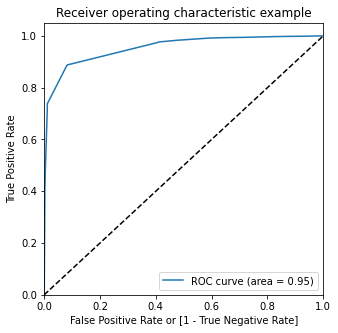

In [690]:
draw_roc(y_train_df["Converted"], y_train_df["Converted_Prob"])

***Inference***

* This is a good model because it is far away from the diagonal plotted of ROC curve. 
* 95% area is covered under the curve.

### Finding the optimal cut-off for the model

In [691]:
y_train_df.head()

,Converted,Converted_Prob,LeadID,Converted_pred
0,0,0.56,2178,1
1,1,0.99,7033,1
2,0,0.05,6889,0
3,1,1.00,4062,1
4,1,0.99,7421,1


In [692]:
num = [float(x)/10 for x in range(10)]

for i in num:
    y_train_df[i]= y_train_df["Converted_Prob"].map(lambda x: 1 if x > i else 0)

y_train_df.head()

,Converted,Converted_Prob,LeadID,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.56,2178,1,1,1,1,1,1,1,0,0,0,0
1,1,0.99,7033,1,1,1,1,1,1,1,1,1,1,1
2,0,0.05,6889,0,1,0,0,0,0,0,0,0,0,0
3,1,1.00,4062,1,1,1,1,1,1,1,1,1,1,1
4,1,0.99,7421,1,1,1,1,1,1,1,1,1,1,1


In [693]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_df["Converted"], y_train_df[i])
    accuracy = (cm1[0,0] + cm1[1,1])/ (X_train.shape[0])
    
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.74   0.98   0.59
0.20  0.20      0.91   0.89   0.92
0.30  0.30      0.91   0.89   0.92
0.40  0.40      0.91   0.89   0.92
0.50  0.50      0.91   0.89   0.92
0.60  0.60      0.89   0.74   0.99
0.70  0.70      0.89   0.74   0.99
0.80  0.80      0.89   0.74   0.99
0.90  0.90      0.89   0.73   0.99


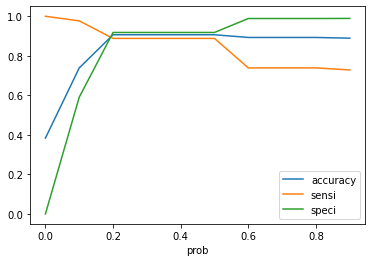

In [694]:
# plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* From the plot, we notice that our optimal cut-off for the model is **0.2**

#### We will now keep the cut-off as 0.2 and predict the output as 1 if `Converted_prob` > 0.2 else 0 

In [695]:
y_train_df['final_prediction'] = y_train_df["Converted_Prob"].map( lambda x: 1 if x > 0.2 else 0)

y_train_df.head()

,Converted,Converted_Prob,LeadID,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.56,2178,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.99,7033,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.05,6889,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1.00,4062,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.99,7421,1,1,1,1,1,1,1,1,1,1,1,1


#### Accuracy

In [696]:
metrics.accuracy_score(y_train_df["Converted"], y_train_df["final_prediction"])

0.9063977308540813

#### Confusion Matrix

In [697]:
conf2 = metrics.confusion_matrix(y_train_df["Converted"], y_train_df["final_prediction"])
conf2

array([[3591,  321],
       [ 273, 2161]])

In [698]:
TP = conf2[1,1] # true positive 
TN = conf2[0,0] # true negatives
FP = conf2[0,1] # false positives
FN = conf2[1,0] # false negatives

#### Sensitivity

In [699]:
TP / (TP+FN)

0.8878389482333607

* Sensitivity has been increased to 89%

#### Specificity

In [700]:
TN / (TN+FP)

0.9179447852760736

#### False Positive Rate 

In [701]:
FP/ (TN+FP)

0.08205521472392638

#### Precision (Positive Predicted Value)

In [702]:
TP / (TP+FP)

0.8706688154713941

#### Negative predictive value

In [703]:
TN /(TN+ FN)

0.9293478260869565

#### Finding precision and recall from sklearn.metrics library

In [704]:
precision_score(y_train_df["Converted"], y_train_df["final_prediction"])

0.8706688154713941

In [705]:
recall_score(y_train_df["Converted"], y_train_df["final_prediction"])

0.8878389482333607

#### Precision and Recall Trade-off

In [706]:
p, r, thresholds = precision_recall_curve(y_train_df["Converted"], y_train_df["Converted_Prob"])

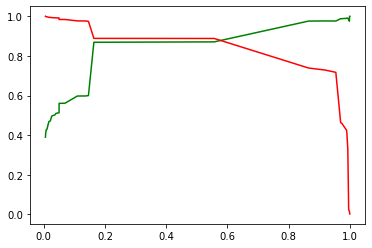

In [707]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Plotting ROC Curve for predictions on optimal cut-off value

#### ROC function

In [708]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [709]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_df["Converted"], 
                                         y_train_df["Converted_Prob"], 
                                         drop_intermediate = False )

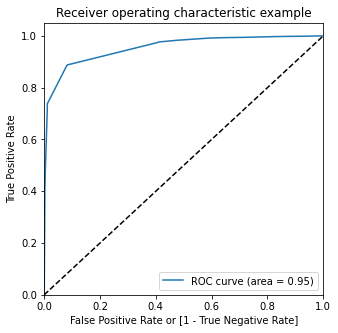

In [710]:
draw_roc(y_train_df["Converted"], y_train_df["Converted_Prob"])

***Inference***

* 95% area is covered under the curve, which indicates that this is a good model.

# Step 7 : Making Predictions on the Test Dataset

#### Standardising the `X_test` dataset

In [711]:
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = sc.transform(
                                                            X_test[["TotalVisits", "Total Time Spent on Website", 
                                                            "Page Views Per Visit"]])

In [712]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3053,-0.39,0.05,-0.65,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
686,1.27,0.92,-0.17,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4091,-0.12,1.68,0.31,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
737,-0.95,-0.88,-1.13,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4390,0.44,-0.11,1.26,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Keeping only those columns for `X_test` that were predicted by the final model (`Model 5`)

In [713]:
final_cols = X_train.columns
final_cols

Index(['Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')

In [714]:
X_test = X_test[final_cols]
X_test.head()

,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
3053,0,0,0,0,0,0,0,0,0,1,0,0,0,0
686,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4091,0,0,0,0,1,0,0,0,0,0,0,0,0,0
737,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4390,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Adding a constant to `X_test` dataset

In [715]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
3053,1.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0
686,1.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4091,1.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0
737,1.00,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4390,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Making predictions on `X_test` dataset

In [716]:
y_test_pred = m3.predict(X_test_sm)
y_test_pred.head()

3053   0.01
686    0.95
4091   0.99
737    1.00
4390   0.05
dtype: float64

#### Converting y_test_pred to dataframe

In [717]:
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
3053,0.01
686,0.95
4091,0.99
737,1.00
4390,0.05


#### Converting y_test to dataframe

In [718]:
y_test.head()

3053    0
686     1
4091    1
737     1
4390    0
Name: Converted, dtype: int64

In [719]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3053,0
686,1
4091,1
737,1
4390,0


#### Creating index as LeadID

In [720]:
y_test_df['LeadID'] = y_test_df.index

#### Resetting index for both dataframes (`y_test_df`, `y_test_pred_df`) to concat them together

In [721]:
y_test_df.reset_index(drop=True, inplace=True)
y_test_pred_df.reset_index(drop=True, inplace=True)

In [722]:
y_test_df.head()

,Converted,LeadID
0,0,3053
1,1,686
2,1,4091
3,1,737
4,0,4390


In [723]:
y_test_pred_df.head()

,0
0,0.01
1,0.95
2,0.99
3,1.00
4,0.05


#### Merging y_test_df and y_test_pred_df together

In [724]:
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df], axis=1)

In [725]:
y_test_pred_final.head()

,Converted,LeadID,0
0,0,3053,0.01
1,1,686,0.95
2,1,4091,0.99
3,1,737,1.00
4,0,4390,0.05


#### Renaming the column

In [726]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

#### Rearranging the columns

In [727]:
y_test_pred_final = y_test_pred_final.reindex(['LeadID','Converted','Converted_Prob'], axis=1)

In [728]:
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob
0,3053,0,0.01
1,686,1,0.95
2,4091,1,0.99
3,737,1,1.00
4,4390,0,0.05


In [729]:
y_test_pred_final.shape

(2721, 3)

#### Creating a column of predictions with the optimal cut-off as 0.2, where result will be 1 if `Converted_prob` > 0.2 else 0

In [730]:
y_test_pred_final['final_prediction'] = y_test_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.2 else 0)

In [731]:
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob,final_prediction
0,3053,0,0.01,0
1,686,1,0.95,1
2,4091,1,0.99,1
3,737,1,1.00,1
4,4390,0,0.05,0


### Test Dataset Evaluation

#### Accuracy

In [732]:
metrics.accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["final_prediction"])

0.8930540242557883

In [733]:
conf3 = metrics.confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final["final_prediction"])
conf3

array([[1561,  161],
       [ 130,  869]])

In [734]:
TP = conf3[1,1] # true positive 
TN = conf3[0,0] # true negatives
FP = conf3[0,1] # false positives
FN = conf3[1,0] # false negatives

#### Sensitivity

In [735]:
TP / float(TP+FN)

0.8698698698698699

#### Specificity

In [736]:
TN / float(TN+FP)

0.9065040650406504

#### False Positive Rate

In [737]:
FP/ float(TN+FP)

0.09349593495934959

#### Positive predictive value 

In [738]:
TP / float(TP+FP)

0.8436893203883495

#### Negative predictive value

In [739]:
TN / float(TN+ FN)

0.9231224127735068

#### Precision

In [740]:
precision_score(y_test_pred_final["Converted"], y_test_pred_final["final_prediction"])

0.8436893203883495

#### Recall

In [741]:
recall_score(y_test_pred_final["Converted"], y_test_pred_final["final_prediction"])

0.8698698698698699

#### F-1 Score

* F1 = 2×(Precision*Recall)/(Precision+Recall)

In [742]:
f1_score(y_test_pred_final["Converted"], y_test_pred_final["final_prediction"])

0.8565795958600296

#### Classification Report

In [743]:
print(classification_report(y_test_pred_final["Converted"], y_test_pred_final["final_prediction"]))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1722
           1       0.84      0.87      0.86       999

    accuracy                           0.89      2721
   macro avg       0.88      0.89      0.89      2721
weighted avg       0.89      0.89      0.89      2721



## Plotting ROC Curve

#### ROC function

In [744]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [745]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final["Converted"], 
                                         y_test_pred_final["Converted_Prob"], 
                                         drop_intermediate = False )

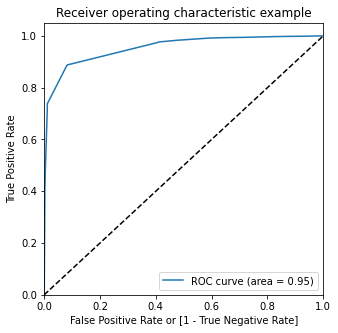

In [746]:
draw_roc(y_train_df.Converted, y_train_df.Converted_Prob)

***Inference***

* 95% area is covered under the curve, which indicates that the model is efficient and is working well on the test dataset as well.

# Step 8 : Calculating the lead score

### Lead Score = 100 * ConversionProbability

In [413]:
leads_test = y_test_pred_final.copy()
leads_test.head()

,LeadID,Converted,Converted_Prob,final_prediction
0,3053,0,0.007066,0
1,686,1,0.954350,1
2,4091,1,0.990644,1
3,737,1,0.999369,1
4,4390,0,0.049806,0


In [414]:
leads_train = y_train_df.copy()
leads_train.head()

,Converted,Converted_Prob,LeadID,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.557025,2178,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.989616,7033,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.049806,6889,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.999983,4062,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.990644,7421,1,1,1,1,1,1,1,1,1,1,1,1


#### Dropping unnecessary columns from train dataset

In [415]:
leads_train = leads_train[['LeadID','Converted','Converted_Prob','final_prediction']]
leads_train.head()

,LeadID,Converted,Converted_Prob,final_prediction
0,2178,0,0.557025,1
1,7033,1,0.989616,1
2,6889,0,0.049806,0
3,4062,1,0.999983,1
4,7421,1,0.990644,1


#### Appending the 2 dataframes `leads_train` and `leads_test` row-wise using append() function to calculate the lead score for each record in the dataset.

In [416]:
leads_final = leads_train.append(leads_test)
leads_final.head()

,LeadID,Converted,Converted_Prob,final_prediction
0,2178,0,0.557025,1
1,7033,1,0.989616,1
2,6889,0,0.049806,0
3,4062,1,0.999983,1
4,7421,1,0.990644,1


#### Checking the shape of each dataframe

In [417]:
print(leads_train.shape)
print(leads_test.shape)
print(leads_final.shape)

(6346, 4)
(2721, 4)
(9067, 4)


#### Checking if all the values in LeadID column are unique or not

In [418]:
leads_final["LeadID"].nunique()

9067

* All the values are unique in `LeadID`

#### Calculating the Lead Score value

In [419]:
# Lead Score = 100 * Conversion_Prob
leads_final['Lead_Score'] = leads_final['Converted_Prob'].apply(lambda x : round(x*100))
leads_final.head()

,LeadID,Converted,Converted_Prob,final_prediction,Lead_Score
0,2178,0,0.557025,1,56
1,7033,1,0.989616,1,99
2,6889,0,0.049806,0,5
3,4062,1,0.999983,1,100
4,7421,1,0.990644,1,99


In [420]:
# Inspecing the max LeadID
leads_final.LeadID.max()

9239

In [421]:
leads_final = leads_final.set_index('LeadID').sort_index(axis=0, ascending = True)
leads_final.head()

,Converted,Converted_Prob,final_prediction,Lead_Score
LeadID,,,,
0,0,0.021084,0,2
1,0,0.010020,0,1
2,1,0.954350,1,95
3,0,0.010020,0,1
4,1,0.954350,1,95


In [422]:
df2["Lead Number"].head()

0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

#### Slicing the Lead Number column from original_leads dataframe

In [423]:
original_leads = df2[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


#### Concatenating `leads_final` and `original_leads` based on index.

#### Lead Score will associated to the Lead Number of each record.

In [424]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

leads_with_score = pd.concat([original_leads, leads_final], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Converted_Prob,final_prediction,Lead_Score
0,660737,0.0,0.021084,0.0,2.0
1,660728,0.0,0.010020,0.0,1.0
2,660727,1.0,0.954350,1.0,95.0
3,660719,0.0,0.010020,0.0,1.0
4,660681,1.0,0.954350,1.0,95.0
5,660680,0.0,0.049806,0.0,5.0
6,660673,1.0,0.954350,1.0,95.0
7,660664,0.0,0.049806,0.0,5.0
8,660624,0.0,0.145761,0.0,15.0
9,660616,0.0,0.145761,0.0,15.0


In [425]:
# Inspecting the dataframe shape
leads_with_score.shape

(9240, 5)

#### Checking missing values

In [426]:
leads_with_score.isnull().sum().sort_values(ascending=False)

Converted           173
Converted_Prob      173
final_prediction    173
Lead_Score          173
Lead Number           0
dtype: int64

* Some missing values have been added due to the concatenation because the `original_leads` dataframe had some missing values 
* We will remove these missing rows

In [427]:
leads_with_score.dropna(subset= ["Converted", "Converted_Prob", "final_prediction", "Lead_Score"], 
                        axis=0, inplace=True)

In [428]:
leads_with_score.isnull().sum().sort_values(ascending=False)

Lead Number         0
Converted           0
Converted_Prob      0
final_prediction    0
Lead_Score          0
dtype: int64

* The missing rows have been removed

# Step 9 : Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [432]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = m3.params[1:]
new_params

Lead Source_Welingak Website                4.33
Last Activity_Olark Chat Conversation      -1.18
Last Activity_SMS Sent                      2.00
Tags_Already a student                     -3.42
Tags_Closed by Horizzon                     6.43
Tags_Diploma holder (Not Eligible)         -2.32
Tags_Interested  in full time MBA          -1.86
Tags_Interested in other courses           -2.07
Tags_Lost to EINS                           5.38
Tags_Not doing further education           -3.18
Tags_Ringing                               -2.82
Tags_Will revert after reading the email    4.81
Tags_invalid number                        -3.31
Tags_switched off                          -3.49
dtype: float64

In [433]:
# Getting a relative coefficient value for all the features with respect to the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                67.30
Last Activity_Olark Chat Conversation      -18.35
Last Activity_SMS Sent                      31.06
Tags_Already a student                     -53.19
Tags_Closed by Horizzon                    100.00
Tags_Diploma holder (Not Eligible)         -36.15
Tags_Interested  in full time MBA          -28.94
Tags_Interested in other courses           -32.19
Tags_Lost to EINS                           83.69
Tags_Not doing further education           -49.41
Tags_Ringing                               -43.93
Tags_Will revert after reading the email    74.77
Tags_invalid number                        -51.45
Tags_switched off                          -54.27
dtype: float64

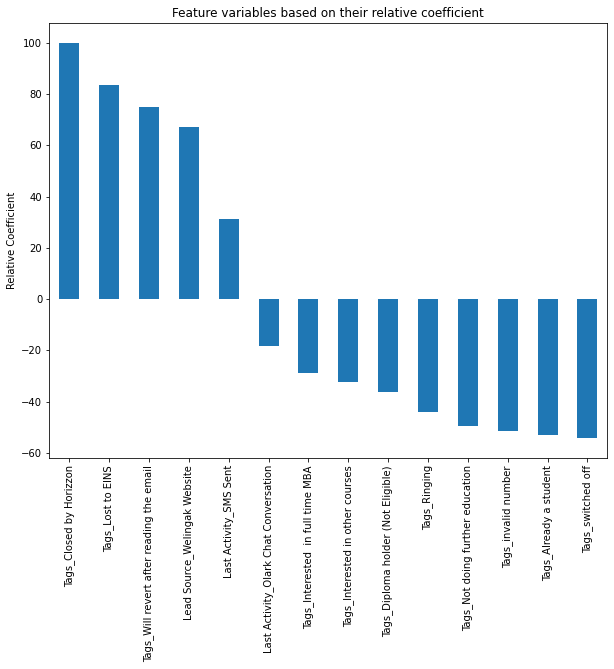

In [434]:
# Plot showing the feature variables based on their relative coefficient values

plt.figure(figsize = (10,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [435]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
4,Tags_Closed by Horizzon,100.00
8,Tags_Lost to EINS,83.69
11,Tags_Will revert after reading the email,74.77
